In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
#importing transaction and customer demographic dataset
transactions = pd.read_csv('Transactions_Cleaned.csv')
cust = pd.read_csv('CustomerDemographic_Cleaned.csv')

In [3]:
# Fetching first 5 transaction records
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [4]:
cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,68
3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,60
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,45


In [5]:
print("Total records(rows) in the Transactions dataset: {}".format(transactions.shape[0]))
print("Total features (columns) in the Tansactions datset:{}".format(transactions.shape[1]))

Total records(rows) in the Transactions dataset: 19803
Total features (columns) in the Tansactions datset:14


In [6]:
print("Total entries(rows) in the Customer Demographics Dataset: {}".format(cust.shape[0]))
print("Total features(columns) in the Customer Demographics Dataset: {}".format(cust.shape[1]))

Total entries(rows) in the Customer Demographics Dataset: 3912
Total features(columns) in the Customer Demographics Dataset: 13


In [7]:
merged_data = pd.merge(transactions, cust, left_on='customer_id', right_on='customer_id', how='inner')

In [8]:
print("Total records (rows) in the Merged Dataset : {}".format(merged_data.shape[0]))
print("Total features (columns) in the Merged Dataset : {}".format(merged_data.shape[1]))

Total records (rows) in the Merged Dataset : 19354
Total features (columns) in the Merged Dataset : 26


In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [10]:
merged_data['transaction_date'] = pd.to_datetime(merged_data['transaction_date'])

1. RFM Analysis



RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

    Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
    Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
    Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)



In [11]:
max_trans_date = max(merged_data['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [12]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.
comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [14]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data. 
rfm_table = merged_data.groupby(['customer_id']).agg({'transaction_date': lambda date: (comparison_date - date.max()).days, 
                                                        'product_id': lambda prod_id : len(prod_id),
                                                        'Profit': lambda p : sum(p)})

In [16]:
# The columns in rfm_table dataframe are not properly named. Renaming of the columns to appropiate name is needed
rfm_table.columns

Index(['transaction_date', 'product_id', 'Profit'], dtype='object')

In [17]:
# Renaming column names to appropiate names
rfm_table.rename(columns= {'transaction_date' : 'recency',
                            'product_id' : 'frequency',
                             'Profit': 'monetory'}, inplace=True)

In [18]:
rfm_table

,recency,frequency,monetory
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [19]:
rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4', '3', '2', '1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['4', '3', '2', '1'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetory'], 4, ['4', '3', '2', '1'])

In [20]:
# RFM_table dataset
rfm_table

,recency,frequency,monetory,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,1,2
2,128,3,2226.26,1,4,3
3,102,8,3362.81,1,1,2
4,195,2,220.57,1,4,4
5,16,6,2394.94,4,3,3
...,...,...,...,...,...,...
3496,256,4,2045.84,1,4,3
3497,52,3,1648.32,2,4,4
3498,127,6,3147.33,1,3,2


In [21]:
rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int) + 10*rfm_table['f_quartile'].astype(int) + rfm_table['m_quartile'].astype(int)

In [22]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [23]:
# RFM table dataset

rfm_table

,recency,frequency,monetory,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,1,2,412,Platinum
2,128,3,2226.26,1,4,3,143,Bronze
3,102,8,3362.81,1,1,2,112,Bronze
4,195,2,220.57,1,4,4,144,Bronze
5,16,6,2394.94,4,3,3,433,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,4,3,143,Bronze
3497,52,3,1648.32,2,4,4,244,Silver
3498,127,6,3147.33,1,3,2,132,Bronze


Merging both RFM Table with Transaction and Customer Tables

The RFM_Table dataframe is merged with the Transactions and Customer Demographics datasets, to gain depper insights of Customer Segemnts along with transactions. The dataframes are joined based on customer_ids from both the datasets

In [24]:
cust_trans_rfm = pd.merge(merged_data, rfm_table, left_on='customer_id', right_on='customer_id', how = 'inner')

In [25]:
cust_trans_rfm

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,recency,frequency,monetory,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,10.0,67,75,3,645.99,2,4,4,244,Silver
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,10.0,67,75,3,645.99,2,4,4,244,Silver
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,10.0,67,75,3,645.99,2,4,4,244,Silver
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,10.0,43,20,7,4179.11,3,2,1,321,Gold
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,10.0,43,20,7,4179.11,3,2,1,321,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,22.0,46,91,4,5170.51,1,4,1,141,Bronze
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,22.0,46,91,4,5170.51,1,4,1,141,Bronze
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,22.0,46,91,4,5170.51,1,4,1,141,Bronze
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,22.0,46,91,4,5170.51,1,4,1,141,Bronze


In [26]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

Creating an Age Group Feature

In [27]:
cust_trans_rfm['Age Group'] = cust_trans_rfm['Age'].apply(lambda x: (math.floor(x/10) + 1)*10)

In [28]:
cust_trans_rfm['rfm_score'].describe()

count    19354.000000
mean       291.692002
std        106.378543
min        111.000000
25%        212.000000
50%        311.000000
75%        411.000000
max        444.000000
Name: rfm_score, dtype: float64

Creating a Detail Customer title / tag based on RFM Score

An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.
The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [32]:
# Function as a lookup to appropiate customer titles based on RFM score.
def cust_score_title_lkup(col):
    rfm_score = col[0]
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [33]:
cust_trans_rfm['detail_cust_title'] = cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

In [34]:
# Function to provide ranks to the customers based on their title.
def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [35]:
# Applying the above functions and creating a new feature rank

cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_rank, axis=1)

2. Exporting to CSV File

After performing data quality assessment(DQA), data cleaning and RFM Analysis on the dataset, it's time to export the dataset to a csv file for further exploratory data analysis (EDA) and this data will drive the Sales Customer Segmenation Dashboard developed in Tableau.

In [36]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [37]:
print("Total records in final dataset : {}".format(cust_trans_rfm.shape[0]))

Total records in final dataset : 19354


3. Data Analysis and Exploration

3.1. New Customer vs Old Customer Age Distributions

Most New / Old Customers are aged between 40-49. The lowest age groups are under 20 and 80+ for both Old and New Customers dataset.
Among the New Customers the most populated age bracket is 20-29 and 60-69, while the maximum Old Customers are from the age bracket 50-69.
There is a steep drop in number of customers in 30-39 age groupsd among the New Customers.

In [38]:
# Loading the New Customers Dataset
new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')

c:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


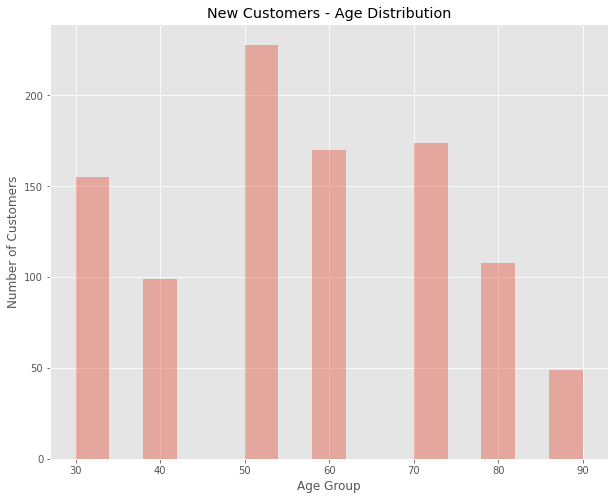

In [39]:
plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()

Here 20 = under 20, 30 = 20-29 age bracket

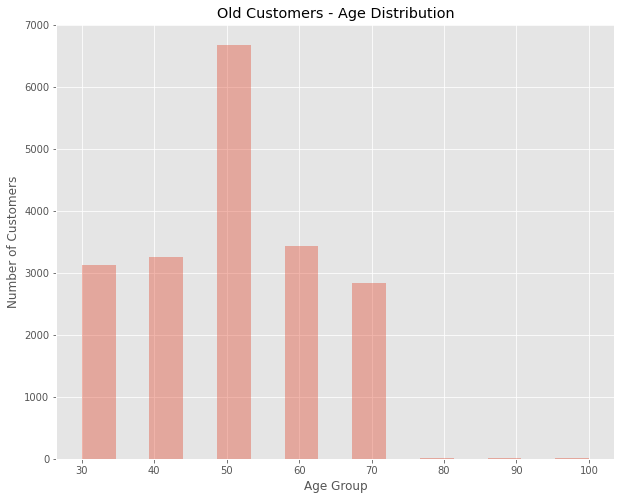

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(cust_trans_rfm['Age Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()

Here 20 = under 20, 30 = 20-29 age bracket

3.2. Bike related purchases over last 3 years by gender

In [43]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}).reset_index()

In [46]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [47]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100

In [48]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


Over the last 3 years approximately 51% of the buyers are women and 49% were male buyers.
Female purchases are approximately 10,000 more than male (numerically). Gender wise majority of the bike sales comes from female customers.

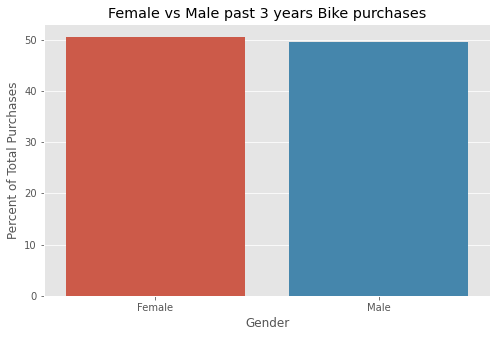

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

3.3 Job Industry Customer Distribution

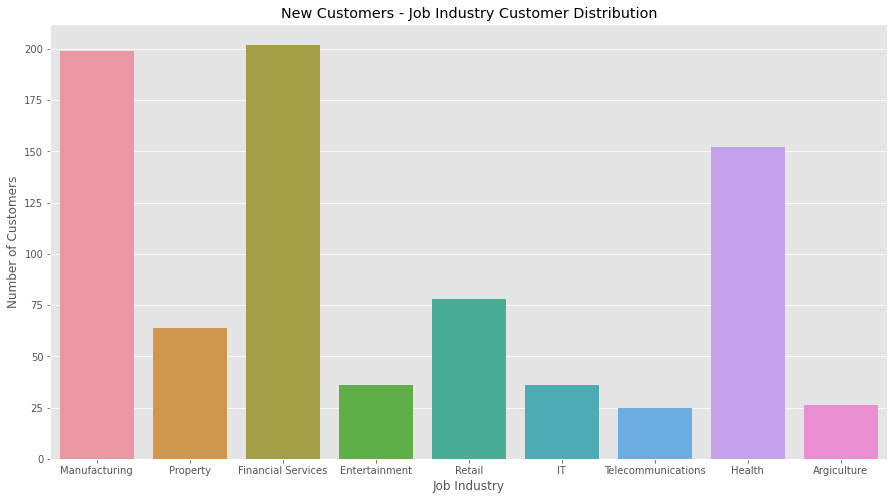

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=new_cust[~(new_cust['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')

plt.show()

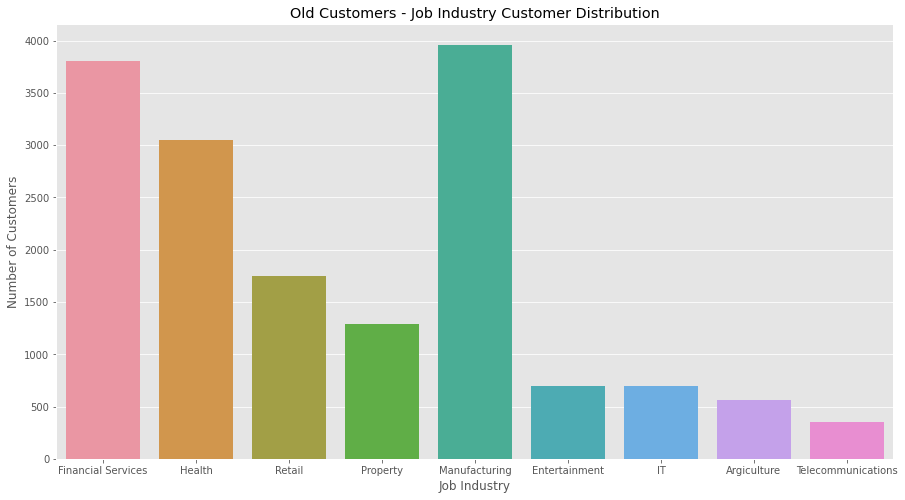

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')

plt.show()

Among the New Customers the highest amount of sales comes from customers having a job in Manufacturing and Financial services sector. The samllest chunk of sales comes from customers in Agriculture sector and from Telecom sector with 3% sales only. Similar trend is observed among Old Customers.

3.4. Wealth Segmentation by Age Group

New Customers

In [52]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'Age Group']).size().reset_index()

In [54]:
wealth_age_seg_new.rename(columns ={0:'Number of Customers'}, inplace=True)
wealth_age_seg_new

,wealth_segment,Age Group,Number of Customers
0,Affluent Customer,30,48
1,Affluent Customer,40,14
2,Affluent Customer,50,58
3,Affluent Customer,60,40
4,Affluent Customer,70,41
5,Affluent Customer,80,23
6,Affluent Customer,90,11
7,High Net Worth,30,36
8,High Net Worth,40,34
9,High Net Worth,50,53


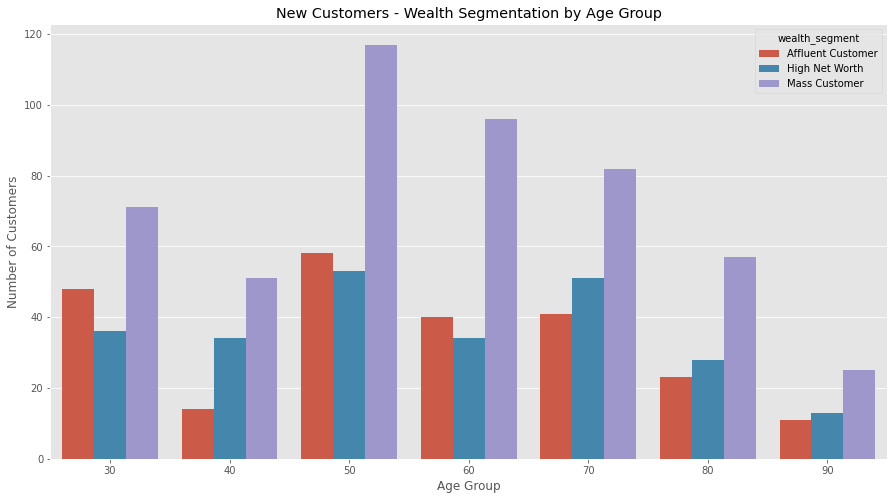

In [55]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

Across all Age Groups the maximum number of customers are classified as 'Mass Customers'. The next being 'High Net Worth'. However among 40-49 aged customers 'Affluent Customers' outperforms the 'High Net Worth' customers.

In all the age groups the most number of customers are 'Mass Customers'. The 2nd largest customer base being the 'High Net Worth' group.
In the age group 40-49 the 'Affluent Customer' group outperforms 'High Net Worth' group

Old Customers

In [56]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'Age Group']).size().reset_index()

In [57]:
wealth_age_seg_old.rename(columns={0:'No. Of Customers'}, inplace=True)

In [61]:
wealth_age_seg_old

,wealth_segment,Age Group,No. Of Customers
0,Affluent Customer,30,871
1,Affluent Customer,40,756
2,Affluent Customer,50,1551
3,Affluent Customer,60,883
4,Affluent Customer,70,644
5,Affluent Customer,80,5
6,Affluent Customer,100,10
7,High Net Worth,30,735
8,High Net Worth,40,848
9,High Net Worth,50,1732


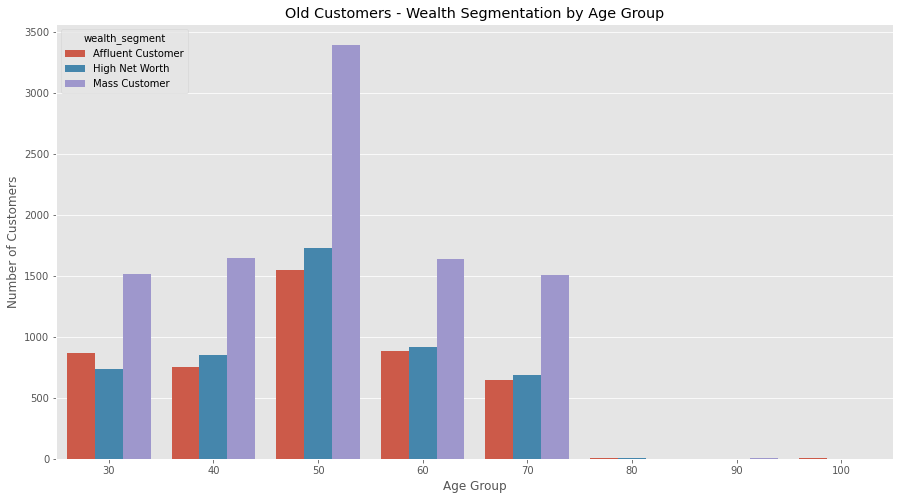

In [62]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age Group', y='No. Of Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.show()

Similar trend (like that of New Customers) is observed among Old Customers

3.5. Car owner across each State

The customer base of the automobile bike company lies in New South Wales, Queensland and Victoria, Australia. 

In [63]:
# Loading the Customer Address Dataset.
cust_addr_info = pd.read_csv('CustomerAddress_Cleaned.csv')

In [64]:
# Merging the RFM data with Customer Address dataset.
cust_trans_addr = pd.merge(cust_trans_rfm, cust_addr_info, left_on = 'customer_id', right_on = 'customer_id', how='inner')

In [65]:
print("RFM table Records count : {}\nAddress Table Records count :{}".format(cust_trans_rfm.shape[0] ,cust_addr_info.shape[0]))

RFM table Records count : 19354
Address Table Records count :3999


In [66]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [67]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


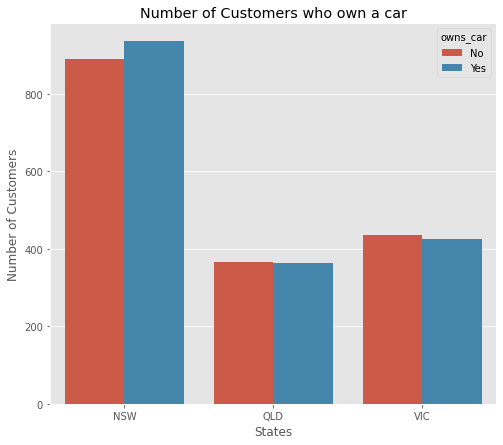

In [68]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()

In New South Wales (NSW) it seems there is a greater amount of people who donot own a car. In Victoria (VIC) the proportion is evenly split. However in Queensland (QLD) there are relatively more people who own the car.

NSW has the largest number of people that do not own a car. It seems that a higher amount of data is collected from NSW compared to other states. In QLD the distribution between customers having a car or not having is even. In Victoria the number is split evenly. Both the numbers are significantly lower than that of NSW.

4. RFM Analysis Scatter Plots

4.1. Recency vs Monetary

<Figure size 576x504 with 0 Axes>

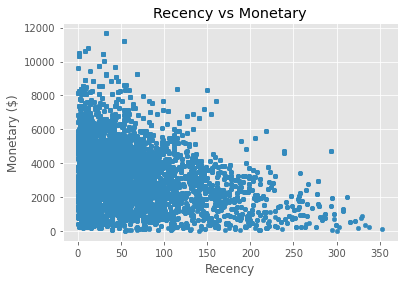

In [70]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency' , y='monetory')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

4.2 Frequency vs Monetary

<Figure size 576x504 with 0 Axes>

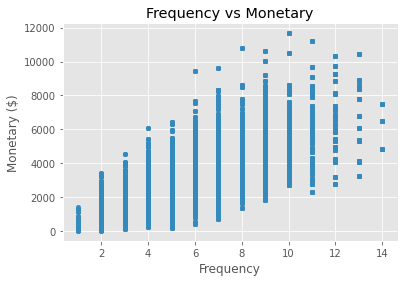

In [71]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='monetory')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

5. Customer Segment Distribution

Finally we can plot the Number of Customers present under a Customer Segment.

In [73]:
# Calculating the number of unique customers under a customer title.

cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [74]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,94
10,Very Loyal,2,262
1,Becoming Loyal,3,279
9,Recent Customer,4,350
8,Potential Customer,5,404
4,Late Bloomer,6,329
5,Loosing Customer,7,574
3,High Risk Customer,8,181
0,Almost Lost Customer,9,832
2,Evasive Customer,10,83


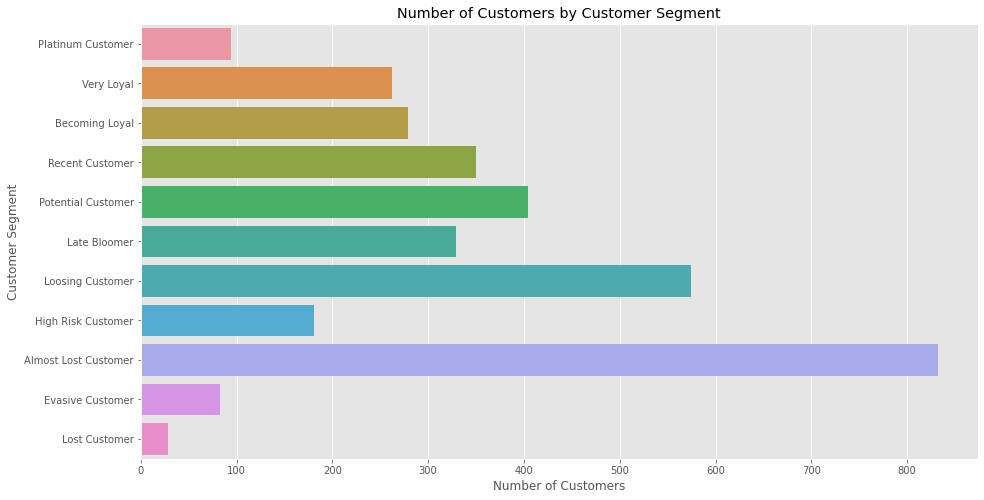

In [75]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()